In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from matplotlib import pyplot as plt

# Loading the Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [4]:
print("Train Data:", x_train.shape, y_train.shape)
print("Test Data:", x_test.shape, y_test.shape)

Train Data: (60000, 28, 28) (60000,)
Test Data: (10000, 28, 28) (10000,)


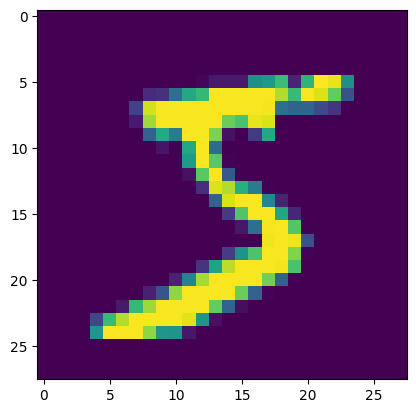

In [6]:
plt.imshow(x_train[0])

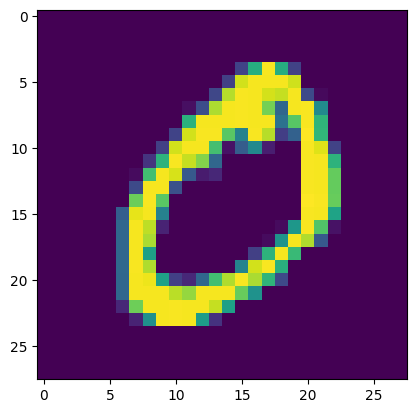

In [8]:
plt.imshow(x_train[1])

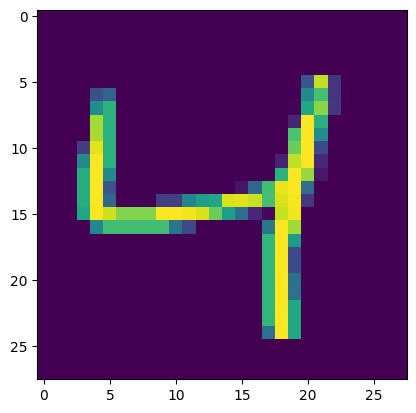

In [9]:
plt.imshow(x_train[2])

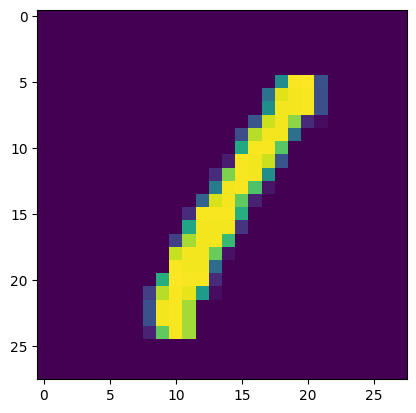

In [10]:
plt.imshow(x_train[3])

# Model Training

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [25]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\saumy\OneDrive\Desktop\PROJECT\Python\HandwrittenDigitClassification-ANN\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [28]:
NN = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9185 - loss: 0.2780 - val_accuracy: 0.9578 - val_loss: 0.1478
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9640 - loss: 0.1199 - val_accuracy: 0.9669 - val_loss: 0.1108
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9753 - loss: 0.0822 - val_accuracy: 0.9708 - val_loss: 0.0965
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0614 - val_accuracy: 0.9710 - val_loss: 0.0966
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0476 - val_accuracy: 0.9743 - val_loss: 0.0931
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9718 - val_loss: 0.1016
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9727 - val_loss: 0.1046
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9921 - loss: 0.0247 - 

# Model Prediction

In [29]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.32921165e-15, 8.84447484e-18, 1.86790300e-16, ...,
        1.00000000e+00, 3.85028814e-12, 3.34951077e-12],
       [7.13354949e-16, 7.26743166e-10, 1.00000000e+00, ...,
        6.26249494e-32, 1.35926090e-17, 3.76561681e-32],
       [4.98230648e-08, 9.99985814e-01, 9.32715648e-06, ...,
        3.84674377e-06, 8.37649452e-07, 1.16653123e-08],
       ...,
       [6.18250612e-23, 1.27808286e-23, 2.13114496e-25, ...,
        7.76878460e-15, 4.30349234e-15, 1.21187687e-13],
       [1.89737126e-29, 4.36363822e-35, 3.46082254e-27, ...,
        4.29421980e-26, 1.11633850e-15, 3.04637965e-28],
       [2.12573462e-20, 2.92168250e-21, 2.34254112e-19, ...,
        2.18860995e-33, 4.75790831e-20, 1.11839783e-29]],
      shape=(10000, 10), dtype=float32)

In [30]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9806

# Plots

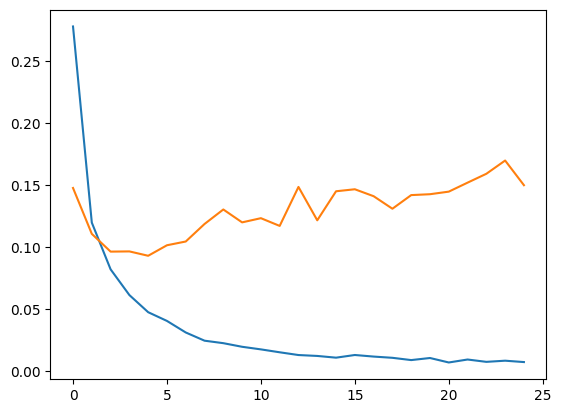

In [33]:
plt.plot(NN.history['loss'])
plt.plot(NN.history['val_loss'])

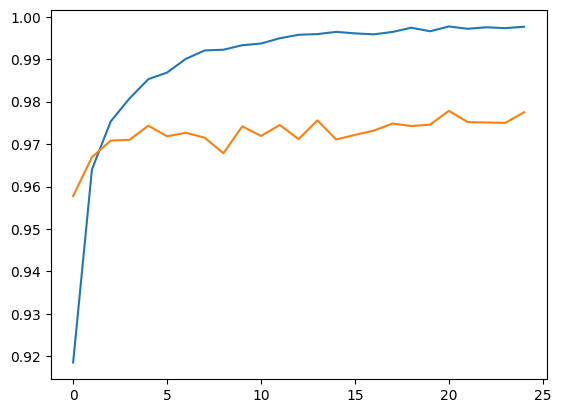

In [34]:
plt.plot(NN.history['accuracy'])
plt.plot(NN.history['val_accuracy'])